<a href="https://colab.research.google.com/github/pagfarias/exercicios-tera/blob/main/Estat%C3%ADstica_para_ci%C3%AAncia_de_dados_28_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Rio de Janeiro*

<img alt="Analisando Airbnb" width="30%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png">


[Airbnb](https://www.airbnb.com.br/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.  
  
Atualmente, conta com mais de 4 milhões de anfitriões, que já receberam mais de 1 bilhão de hóspedes em quase todos os países.  

Uma das iniciativas do Airbnb é disponibilizar os dados de locações em algumas as principais cidades do mundo, para que possam ser analisados. Esses dados são disponibilizados no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Hoje, iremos analisar os dados da cidade do **Rio de Janeiro**.

## Obtenção dos dados




In [2]:
# importar os bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um dataframe
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-06-20/visualisations/listings.csv")

## Análise exploratória dos dados
O objetivo dessa etapa é uma análise exploratória dos dados, bem como a identificação de quais são as variáveis disponíveis para análise.


### Criação de um dicionário das variáveis
Vamos avaliar quais variáveis compõem o banco, e criar a partir delas um dicionário com o nome da variável no banco e o que ela significa.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24881 non-null  int64  
 1   name                            24860 non-null  object 
 2   host_id                         24881 non-null  int64  
 3   host_name                       24764 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24881 non-null  object 
 6   latitude                        24881 non-null  float64
 7   longitude                       24881 non-null  float64
 8   room_type                       24881 non-null  object 
 9   price                           24881 non-null  int64  
 10  minimum_nights                  24881 non-null  int64  
 11  number_of_reviews               24881 non-null  int64  
 12  last_review                     

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,272,2022-04-23,1.87,1,311,8,NaN
1,556930647599893392,Venha passar uma pernoite em um veleiro na Urca!,198206849,Andréia,NaN,Urca,-22.94781,-43.16351,Private room,280,1,1,2022-02-19,0.25,1,365,1,NaN
2,1174007,100% Best View In Copa In Suite 2,3962758,Thiago Luiz,NaN,Copacabana,-22.97277,-43.17966,Private room,107,2,177,2022-06-07,1.69,6,357,29,NaN
3,8410797,Ipanema(Arpoador) 100mdo Mar/ Jan & Carnaval +Fev,42038091,Sheila,NaN,Ipanema,-22.98871,-43.19334,Private room,1000,3,1,2017-09-28,0.02,3,362,0,NaN
4,28053241,Navegar a Bordo de um Veleiro Francês no Rio!,193860988,Luciano,NaN,Urca,-22.95056,-43.17175,Private room,1850,2,0,NaN,NaN,1,180,0,NaN


In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
24876,649994149549663983,Apartamento encantador no centro,184987752,Tatiane,NaN,Centro,-22.908390,-43.187100,Entire home/apt,251,1,0,NaN,NaN,1,358,0,NaN
24877,650006296362728202,Apartamento encantador em Copacabana,327150319,Elisabeth,NaN,Copacabana,-22.966930,-43.181400,Entire home/apt,440,1,1,2022-06-18,1.0,2,358,1,NaN
24878,650011310811912783,Apto em frente à praia com vista lateral mar,238604267,Claudia,NaN,Barra da Tijuca,-23.009351,-43.344853,Entire home/apt,380,1,0,NaN,NaN,12,90,0,NaN
24879,650020855611122186,Apto com vista deslumbrante na Barra,238604267,Claudia,NaN,Barra da Tijuca,-23.008220,-43.343700,Entire home/apt,300,2,0,NaN,NaN,12,89,0,NaN
24880,650025403378811576,Jumpinbed - Studio in Copacabana in front of t...,397106841,Jumpers,NaN,Copacabana,-22.976880,-43.189920,Entire home/apt,315,1,0,NaN,NaN,15,334,0,NaN


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### Qual a porcentagem de valores ausentes no banco de dados?

In [12]:
100*df.isnull().sum()/df.shape[0]

# Esse código calcula a porcentagem de valores ausentes
# Boas perguntas para responder: o que o 'df.shape[0]' da fórmula indica?
# Essa forma de representação das porcentagens é a mais intuitiva para um leigo? O que você modificaria?
# Como ordenar essa proporção de valores ausentes do maior para o menor?

id                                  0.000000
name                                0.084402
host_id                             0.000000
host_name                           0.470238
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        30.818697
reviews_per_month                  30.818697
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

### Análise descritiva univariada

#### Perguntas a serem respondidas

- Qual o bairro do Rio de Janeiro com mais acomodações disponíveis para locação? Quantos porcento das acomodações disponíveis estão situadas nesse bairro?
- Qual o tipo de acomodação mais disponibilizado para locação pelo Airbnb no Rio de Janeiro?
- Qual a média dos preços de aluguel? E a mediana? Há diferenças entre esses valores? Por que?
- Qual a média de reviews por mês que uma acomodação recebe?

#### Cálculo de medidas de posição, dispersão e frequências

A ideia aqui é que você consiga realizar essa análise e interpretá-la.

In [ ]:
vars_quant = [
    "price", 
    "minimum_nights", 
    "number_of_reviews", 
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "number_of_reviews_ltm"
]

vars_quali = [
    "neighbourhood",
    "room_type"
]

In [ ]:
df[vars_quant].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24881.00,24881.00,24881.00,17213.00,24881.00,24881.00,24881.00
mean,745.40,5.36,16.82,0.81,8.02,214.77,5.29
std,4983.64,26.04,36.86,1.01,22.31,131.69,9.90
min,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,180.00,1.00,0.00,0.13,1.00,89.00,0.00
50%,300.00,2.00,3.00,0.45,1.00,212.00,1.00
75%,600.00,4.00,15.00,1.10,4.00,356.00,6.00
max,591723.00,1125.00,534.00,18.74,184.00,365.00,189.00


In [ ]:
100*df['neighbourhood'].value_counts(normalize=True)

# Qual a diferença entre adicionar ou não o argumento 'normalize = True' em value.counts?

Copacabana                  29.580805
Ipanema                     10.172421
Barra da Tijuca              9.818737
Leblon                       4.875206
Recreio dos Bandeirantes     4.650135
                              ...    
Vila Kosmos                  0.004019
Jacarezinho                  0.004019
Zumbi                        0.004019
Barros Filho                 0.004019
Jardim América               0.004019
Name: neighbourhood, Length: 153, dtype: float64

#### Visualização gráfica da análise descritiva

##### Histogramas para as variáveis numéricas

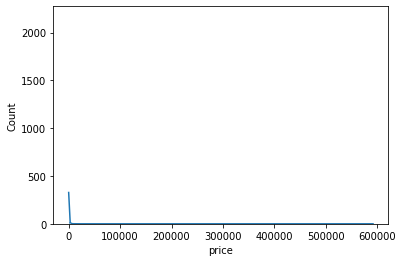

In [ ]:
sns.histplot(df['price'], kde=True);

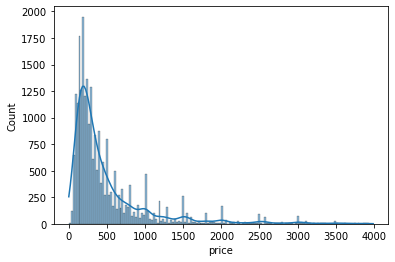

In [ ]:
sns.histplot(df[df.price < 4000].price, kde=True);

##### Boxplots para as variáveis numéricas

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


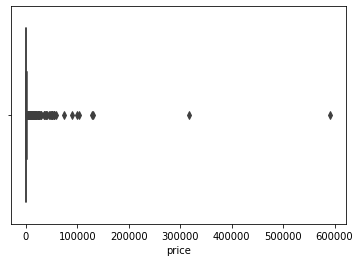

In [ ]:
sns.boxplot(df['price']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


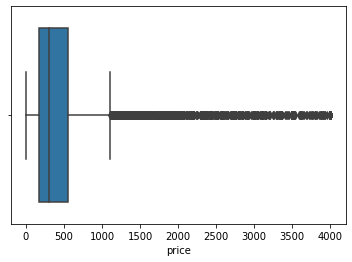

In [ ]:
sns.boxplot(df[df['price'].between(0, 4000)].price);

##### Há *outliers*?
Com base nas estatísticas descritivas acima, podemos dizer que há valores discrepantes?

##### Gráficos de barras para as variáveis categóricas

In [ ]:
def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize = True, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proporção"))
    plt.ylim(0,1)
    plt.show()

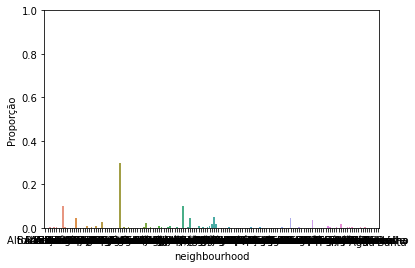

In [ ]:
grafico_barras_prop(df, 'neighbourhood')

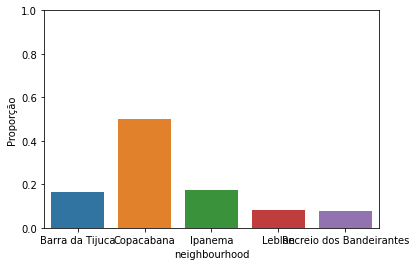

In [ ]:
top5 = df['neighbourhood'].value_counts().index[:5]

df_top5 = df[df['neighbourhood'].isin(top5)]

grafico_barras_prop(df_top5, 'neighbourhood');

##### E se eu quisesse avaliar um único bairro, ou um único tipo de acomodação?

In [ ]:
df[df.neighbourhood == 'Copacabana'].price.describe()

count      7360.000000
mean        591.293342
std        2767.632534
min           0.000000
25%         179.000000
50%         259.000000
75%         452.000000
max      129068.000000
Name: price, dtype: float64

### Análise descritiva bivariada

#### Perguntas a serem respondidas

- Qual o bairro do Rio de Janeiro tem as acomodações mais caras?
- Qual tipo de acomodação tende a ser mais cara?
- Qual tipo de acomodação recebe mais reviews?
- A quantidade de reviews está associada a quais outras variáveis?

#### Entre variáveis numéricas (quantitativas)

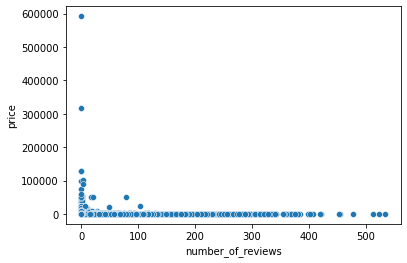

In [ ]:
sns.scatterplot(data = df, y = 'price', x = 'number_of_reviews');

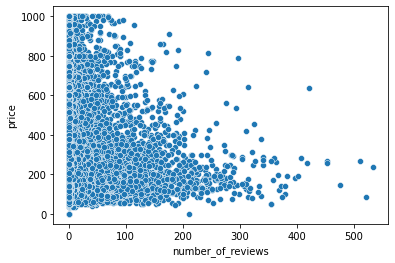

In [ ]:
sns.scatterplot(data = df[df.price <= 1000], y = 'price', x = 'number_of_reviews');

In [ ]:
corr = df[vars_quant].corr().round(3)
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000,0.014,-0.038,-0.061,0.009,0.043,-0.047
minimum_nights,0.014,1.000,-0.035,-0.041,0.002,0.025,-0.048
number_of_reviews,-0.038,-0.035,1.000,0.511,-0.050,-0.142,0.698
reviews_per_month,-0.061,-0.041,0.511,1.000,0.007,-0.103,0.771
calculated_host_listings_count,0.009,0.002,-0.050,0.007,1.000,-0.008,-0.017
availability_365,0.043,0.025,-0.142,-0.103,-0.008,1.000,-0.155
number_of_reviews_ltm,-0.047,-0.048,0.698,0.771,-0.017,-0.155,1.000


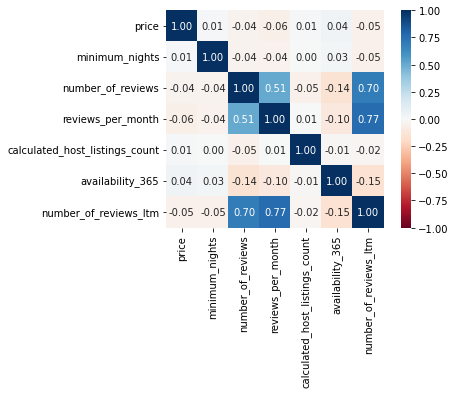

In [ ]:
# Visualizar as correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f',
            square=True, linecolor='white',
            annot=True, vmin = -1, vmax = 1,);

#### Entre uma variável numérica e uma categórica

In [ ]:
df[['neighbourhood', 'price']].groupby('neighbourhood').describe().round(2)

price                                                    \
                  count     mean      std    min      25%     50%     75%   
neighbourhood                                                               
Abolição            4.0   317.00   329.19   89.0   119.00   189.5   387.5   
Acari               1.0   250.00      NaN  250.0   250.00   250.0   250.0   
Alto da Boa Vista  36.0  1680.86  2308.21   54.0   315.75   725.0  2500.0   
Anchieta            2.0  2719.00  2713.88  800.0  1759.50  2719.0  3678.5   
Andaraí            39.0  1008.44  3063.84   50.0   111.50   200.0   475.0   
...                 ...      ...      ...    ...      ...     ...     ...   
Vila Militar        2.0   122.00    32.53   99.0   110.50   122.0   133.5   
Vila Valqueire     15.0   418.13   355.86   60.0    93.50   206.0   750.0   
Vila da Penha       8.0   166.88    79.32   60.0   135.00   155.0   182.5   
Zumbi               1.0   149.00      NaN  149.0   149.00   149.0   149.0   
Água Santa          3.0   248.33   225.41   65.0   122.50   180.0   340.0   

                            
                       max  
neighbourhood               
Abolição             800.0  
Acari                250.0  
Alto da Boa Vista   9600.0  
Anchieta            4638.0  
Andaraí            17000.0  
...                    ...  
Vila Militar         145.0  
Vila Valqueire      1000.0  
Vila da Penha        335.0  
Zumbi                149.0  
Água Santa           500.0  

[153 rows x 8 columns]

In [ ]:
df_top5.groupby('neighbourhood').price.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Barra da Tijuca,2443.0,986.89,2339.67,0.0,272.0,450.0,900.0,51627.0
Copacabana,7360.0,591.29,2767.63,0.0,179.0,259.0,452.0,129068.0
Ipanema,2531.0,739.14,1535.20,55.0,269.0,420.0,750.0,50000.0
Leblon,1213.0,936.24,2389.91,52.0,331.0,500.0,800.0,50000.0
Recreio dos Bandeirantes,1157.0,785.90,1571.91,51.0,215.0,390.0,774.0,25000.0


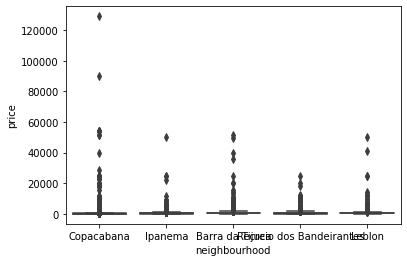

In [ ]:
sns.boxplot(x = 'neighbourhood', y = 'price', data = df_top5);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


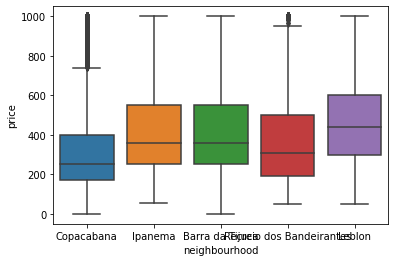

In [ ]:
sns.boxplot(x = 'neighbourhood', y = 'price', data = df_top5[df.price <= 1000]);

#### Entre duas variáveis categóricas

In [ ]:
def grafico_barras_prop_grp(data, variable, grp):
    (data
     .groupby(variable)[grp]
     .value_counts(normalize=True, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe((sns.catplot, "data"), x = variable, y = "Proporção", hue = grp, kind = "bar"))
    plt.ylim(0,1)
    plt.show()

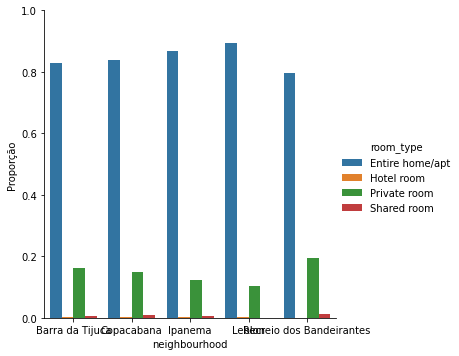

In [ ]:
grafico_barras_prop_grp(data = df_top5, variable = 'neighbourhood', grp = 'room_type')

In [ ]:
pd.crosstab(df_top5.neighbourhood, df_top5.room_type, normalize='index')

# Para investigar: qual a função do argumento normalize='index'?

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Barra da Tijuca,0.828080,0.002865,0.163324,0.005731
Copacabana,0.840217,0.001359,0.149457,0.008967
Ipanema,0.868036,0.001185,0.124062,0.006717
Leblon,0.894477,0.002473,0.102226,0.000824
Recreio dos Bandeirantes,0.795160,0.000000,0.193604,0.011236


### Análise espacial das acomodações

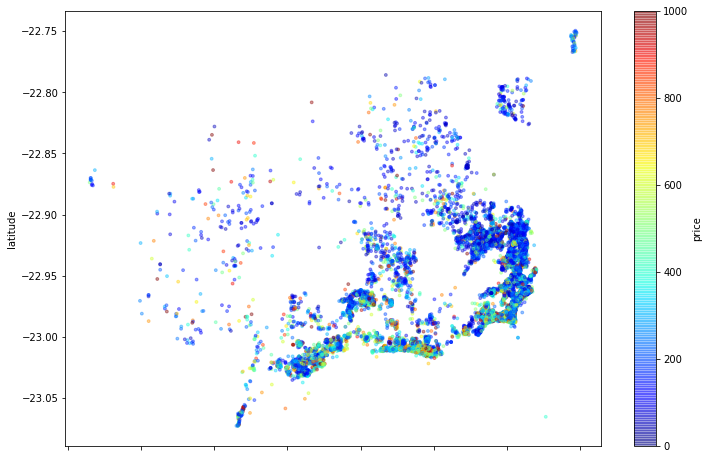

In [ ]:
df[df.price <= 1000].plot(kind = 'scatter',
                          x = 'longitude',
                          y = 'latitude',
                          alpha = 0.4,
                          c = 'price',
                          s = 8,
                          cmap = plt.get_cmap('jet'),
                          figsize = (12,8));

### Análises inferenciais

#### Intervalo de confiança 95% para médias

In [ ]:
import scipy.stats as st
import numpy as np

st.norm.interval(alpha = 0.95,
                 loc = np.mean(df[df.neighbourhood == 'Leblon'].price),
                 scale = st.sem(df[df.neighbourhood == 'Leblon'].price))

(801.7502952914043, 1070.7361020705084)

In [ ]:
st.norm.interval(alpha = 0.95,
                 loc = np.mean(df[df.neighbourhood == 'Copacabana'].price),
                 scale = st.sem(df[df.neighbourhood == 'Copacabana'].price))

(528.0641534554413, 654.5225313271674)

In [ ]:
st.norm.interval(alpha = 0.95,
                 loc = np.mean(df[(df.neighbourhood == 'Barra da Tijuca') & (df.price < 1000)].price),
                 scale = st.sem(df[(df.neighbourhood == 'Barra da Tijuca') & (df.price < 1000)].price))

(393.55420093213667, 412.70468500950784)

#### Há diferenças estatisticamente significativas no preço dos diferentes bairros (top 5)?

##### Teste de hipóteses - ANOVA

Neste caso queremos comparar a média de preços entre os cinco bairros com mais locações no período. Como queremos comparar as médias de mais de dois grupos independentes, teste F da ANOVA será utilizado.

As hipóteses desse teste serão:

* H0 (nula) = Não existe diferença das médias de preços entre os bairros. - *Escolhida quando p > 0.05*
* H1 (alternativa) = Existe pelo menos uma diferença nas médias de preços dos diferentes bairros. - *Escolhida quando p < 0.05*

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('price ~ neighbourhood',
          data = df_top5).fit()
                
aov_table = sm.stats.anova_lm(mod, typ = 3)
print(aov_table)

                     sum_sq       df           F        PR(>F)
Intercept      2.379380e+09      1.0  409.165280  9.245124e-90
neighbourhood  3.580426e+08      4.0   15.392521  1.440834e-12
Residual       8.547769e+10  14699.0         NaN           NaN


In [ ]:
# Comparações entre pares
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df_top5['price'],
                          df_top5['neighbourhood'],
                          alpha = 0.05)

print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1              group2           meandiff p-adj    lower     upper   reject
------------------------------------------------------------------------------------
Barra da Tijuca               Copacabana -395.5998  0.001 -549.2101 -241.9896   True
Barra da Tijuca                  Ipanema -247.7501 0.0027 -434.3393  -61.1609   True
Barra da Tijuca                   Leblon    -50.65    0.9 -281.7246  180.4247  False
Barra da Tijuca Recreio dos Bandeirantes -200.9891 0.1335 -435.7708   33.7926  False
     Copacabana                  Ipanema  147.8497 0.0601   -3.7424  299.4418  False
     Copacabana                   Leblon  344.9499  0.001  141.0868  548.8129   True
     Copacabana Recreio dos Bandeirantes  194.6107 0.0798  -13.4447  402.6662  False
        Ipanema                   Leblon  197.1002  0.132  -32.6378  426.8382  False
        Ipanema Recreio dos Bandeirantes    46.761    0.9 -186.70

O post-hoc de Tukey compara os grupos dois a dois. Iremos considerar que há diferenças entre os grupos quando p.adj < 0.05 (observe que, nesses casos, a coluna reject diz True).

#### Há diferenças estatisticamente significativas no preço dos diferentes tipos de acomodações?

Agora cabe a você responder a essa pergunta!